In [1]:
import pandas as pd

In [3]:
# steps to upload local file to google colab
from google.colab import files
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.drop('car_ID',axis=1,inplace=True) # deleting car_id column

In [11]:
#finding unique values in a column in df
pd.unique(df['CarName'])

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [15]:
df['brand_name'] = df['CarName'].apply(lambda x: x.split(" ")[0])

In [18]:
pd.unique(df['brand_name'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
df['brand_name'] = df['brand_name'].replace('maxda','mazda')
df['brand_name']= df['brand_name'].replace('Nissan','nissan')


In [30]:
replace_dict = dict([('porcshce','porsche'),('toyouta','toyota'),('vokswagen','volkswagen')])

In [31]:
for k,v in replace_dict.items():
  df['brand_name'].replace(k,v,inplace=True)

In [32]:
pd.unique(df['brand_name'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [39]:
for col in df.columns:
  if df[col].dtype =='O':
    print('{}:{}'.format(col,len(pd.unique(df[col]))))

CarName:147
fueltype:2
aspiration:2
doornumber:2
carbody:5
drivewheel:3
enginelocation:2
enginetype:7
cylindernumber:7
fuelsystem:8
brand_name:23


In [40]:
pd.unique(df['carbody'])

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [42]:
pd.unique(df['enginetype'])

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [43]:
pd.unique(df['cylindernumber'])

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [45]:
pd.unique(df['fuelsystem'])

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [73]:
del df['CarName']

# Exploratory Data Analysis

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

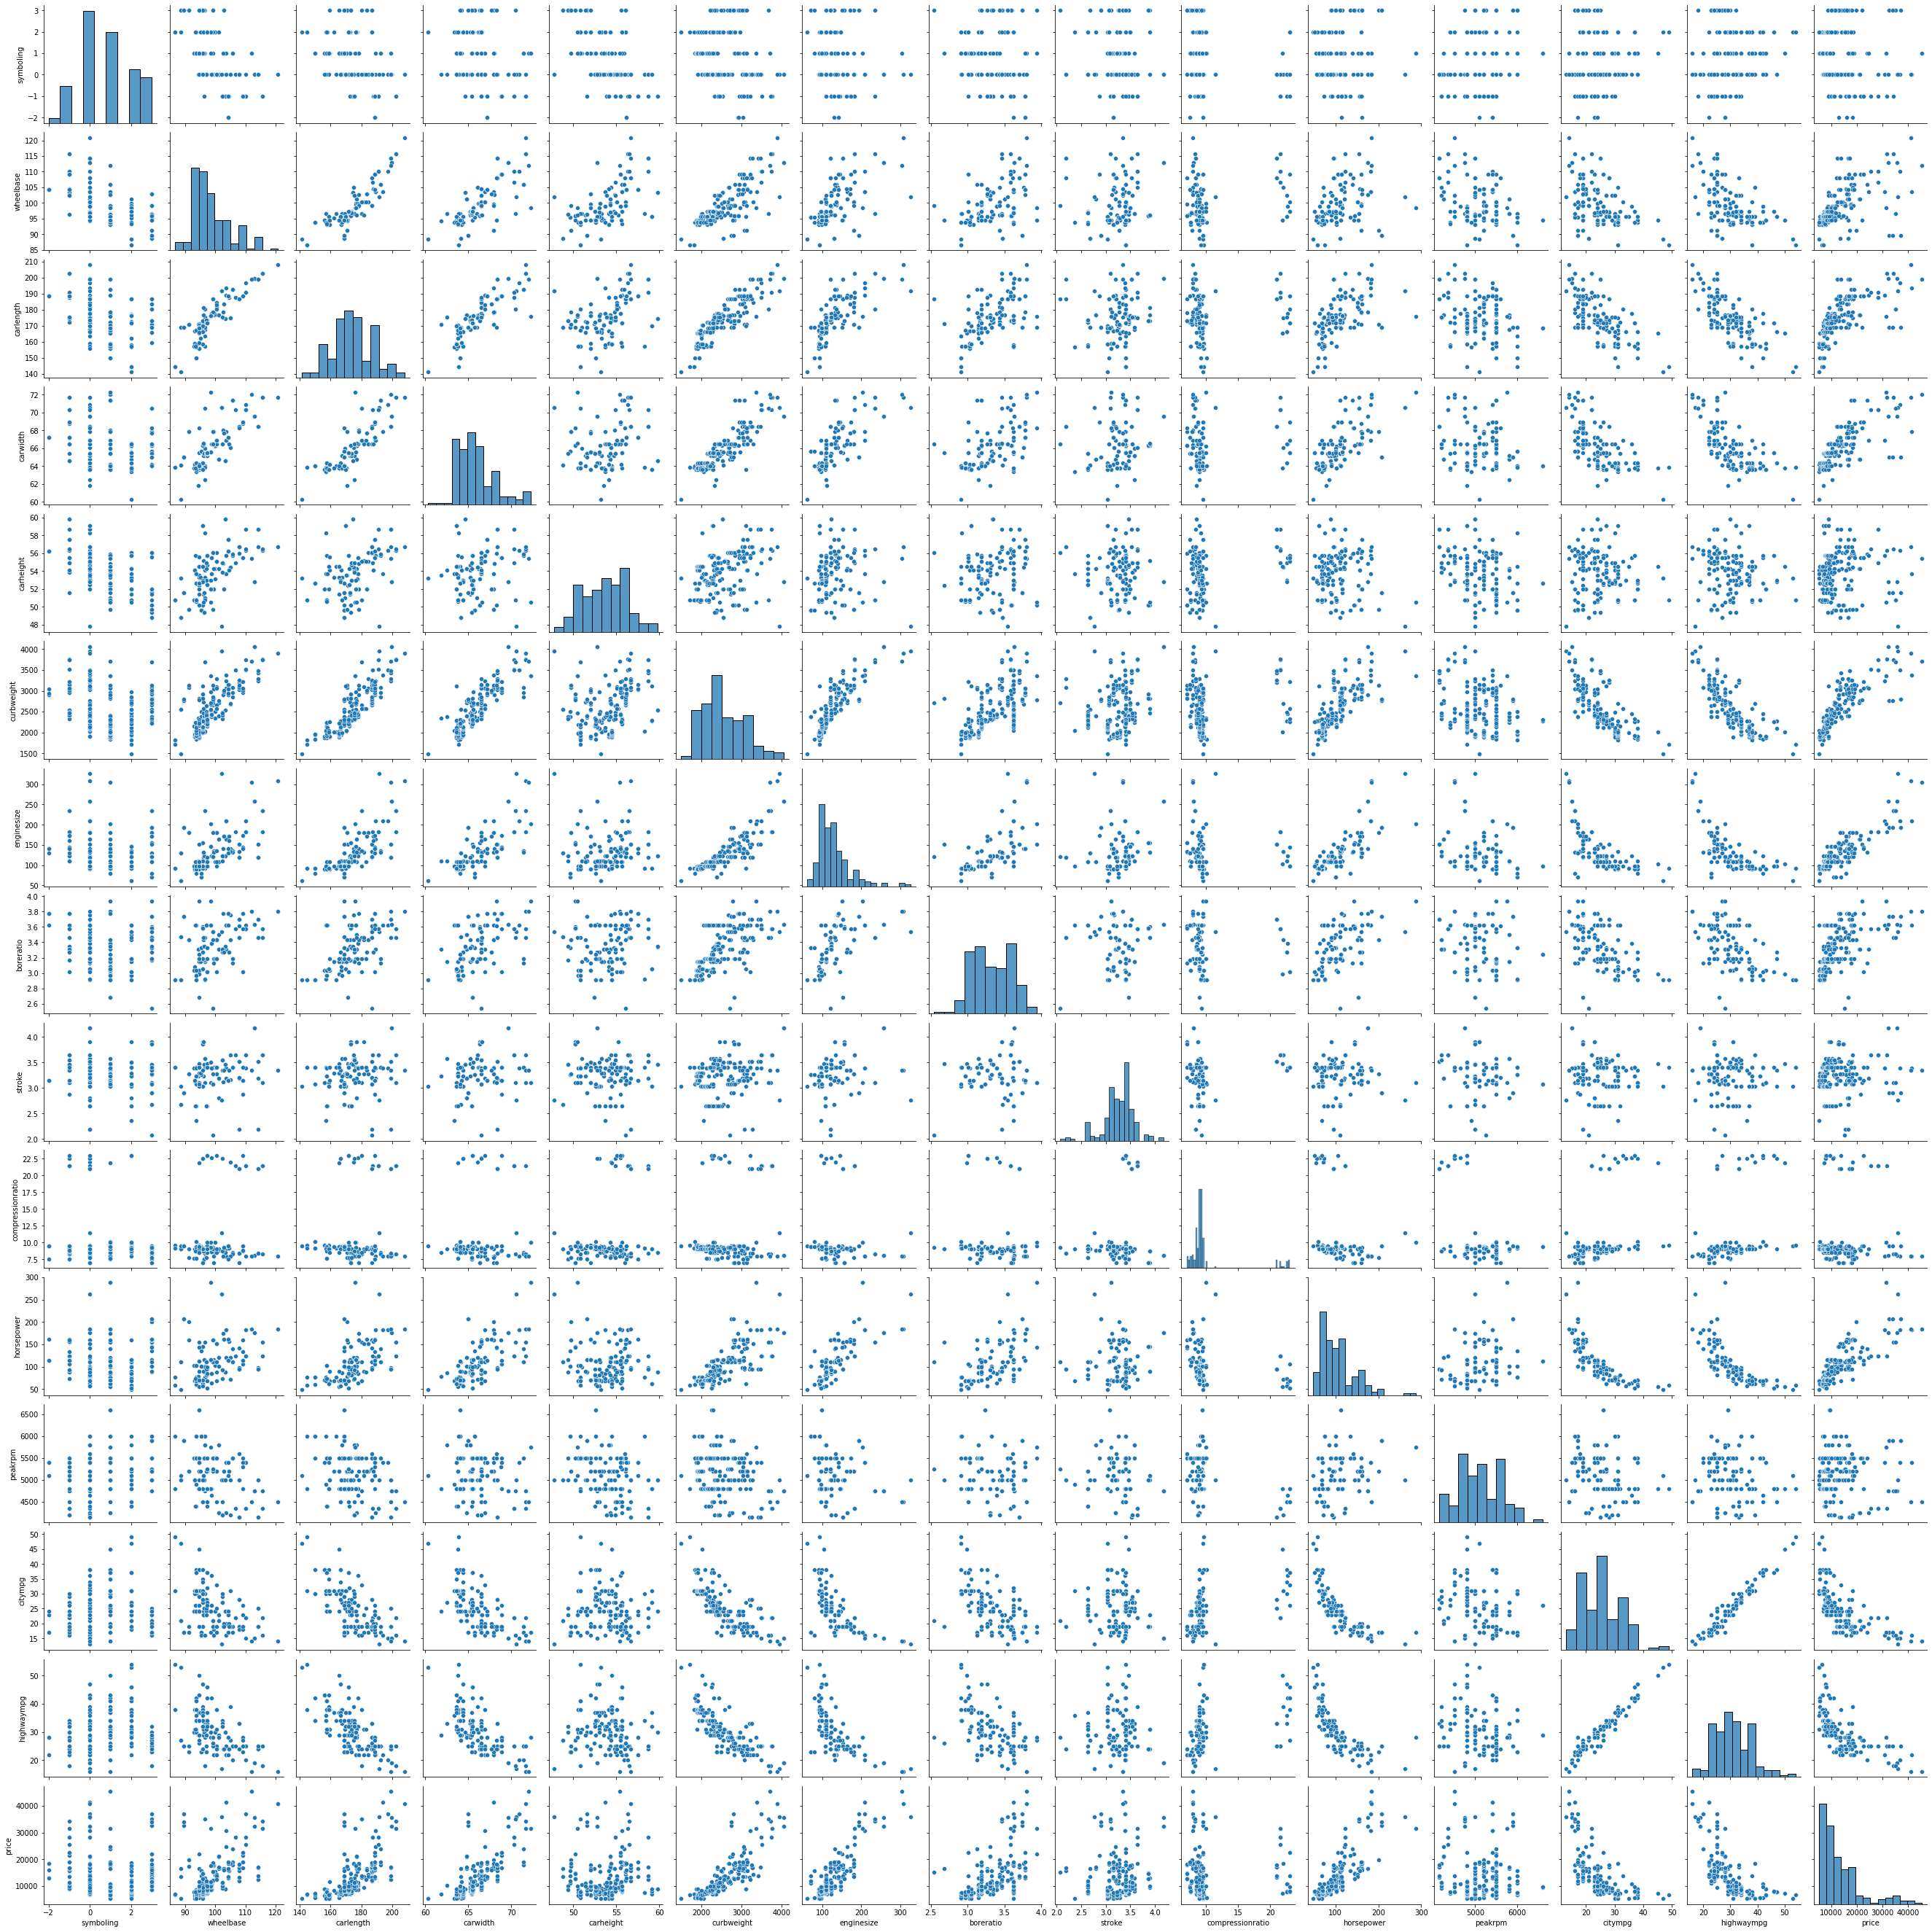

In [47]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


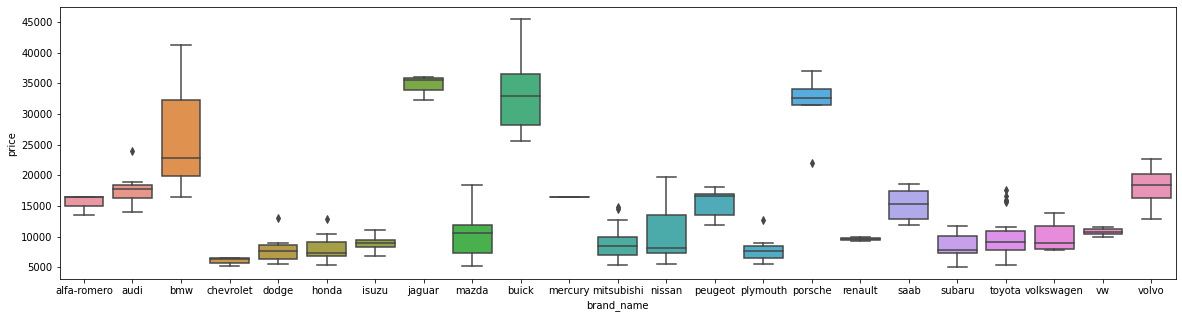

In [60]:
plt.figure(figsize=(20,5))
sns.boxplot(df['brand_name'],df['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


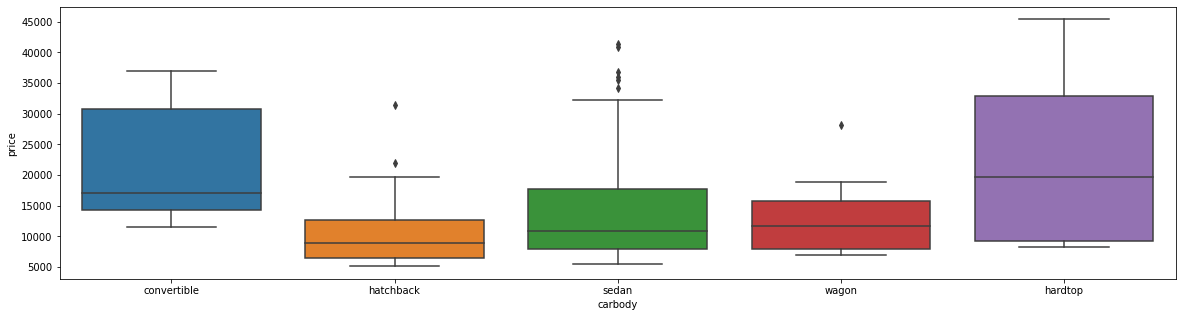

In [59]:
plt.figure(figsize=(20,5))
sns.boxplot(df['carbody'],df['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


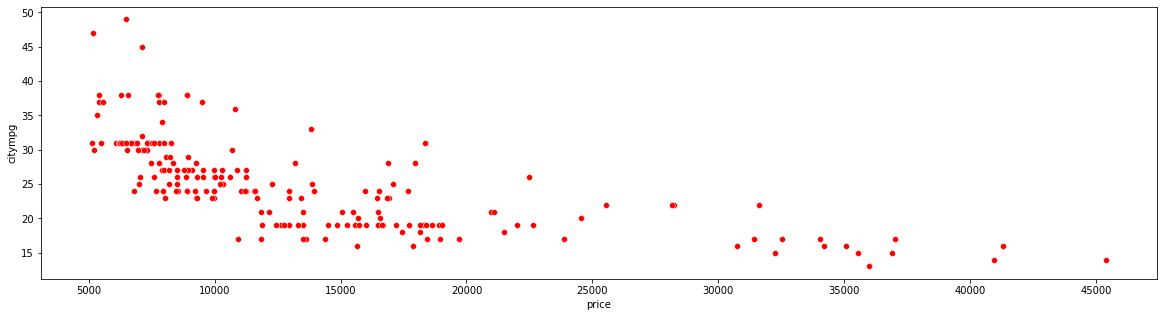

In [68]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['price'],df['citympg'],color='red',marker ="o")
plt.show()

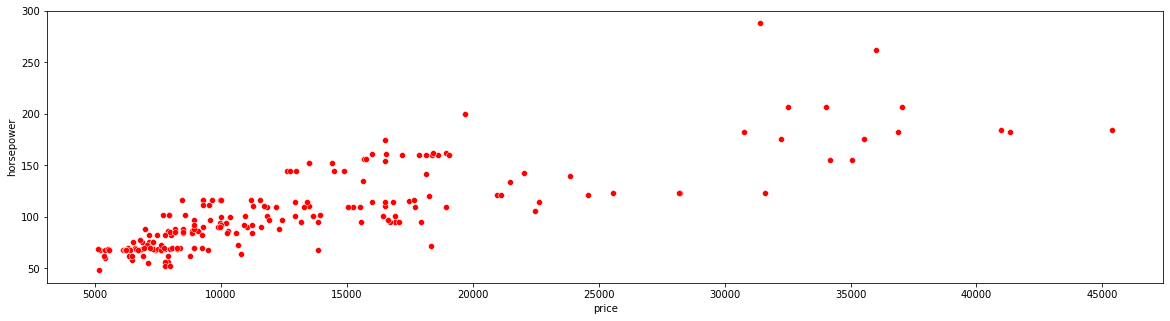

In [71]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['price'],y=df['horsepower'],color='red',marker ="o")
plt.show()

# Data Preparation for Machine Learning Model

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [76]:
pd.get_dummies(df['carbody']) #create one-hot encoded vectors for a column

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


In [77]:
pd.get_dummies(df['carbody'],drop_first=True) #create one-hot encoded vectors for a column and drop first column to avoid dummy variable trap

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


In [81]:
# creating dummy colums for all the columns in dataframe with object datatype
dummy=pd.DataFrame()
for col in df.columns:
  if df[col].dtypes == 'O':
    temp = pd.get_dummies(df[col],drop_first=True,prefix = col)
    dummy=pd.concat([dummy,temp],axis =1)

In [85]:
len(dummy) == len(df)

True

In [99]:
#extracting numeric columns
df_numeric= pd.DataFrame()
for col in df.columns:
  if df[col].dtypes !='O':
    df_numeric=pd.concat([df_numeric,df[[col]]],axis=1)


In [101]:
df_final = pd.concat([dummy,df_numeric],axis=1)

In [103]:
df_final.shape

(205, 66)

In [104]:
df.shape

(205, 25)

In [107]:
df_final.columns

Index(['fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_name_audi',
       'brand_name_bmw', 'brand_name_buick', 'brand_name_chevrolet',
       'brand_name_dodge', 'brand_name_honda', 'brand_name_isuzu',
       'brand_name_jaguar', 'brand_name_mazda', 'brand_name_mercury',
       'brand_name_mitsubishi', 'brand_name_nissan', 'brand_name_peugeot',
       'brand_name_plymouth', 'brand_name_porsche', 'brand_name_rena

# Data Modelling

In [105]:
from sklearn.model_selection import train_test_split

In [108]:
X= df_final.drop('price',axis=1)
Y= df_final['price']

In [174]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [165]:
from sklearn.preprocessing import StandardScaler,Normalizer
sc = Normalizer()
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Linear Regression using Scikit Learn

In [175]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [184]:
model = LinearRegression(normalize=True)

In [185]:
model.fit(x_train,y_train) # training the ML Model or fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [186]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [187]:
from sklearn.metrics import r2_score,mean_squared_error

In [188]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

In [189]:
(r2_train,r2_test)

(0.9767958062271098, 0.8683947993198693)

In [182]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

1177.6304037292045

In [183]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

3118.9905844536984

In [190]:
model.intercept_

8.31727874591749e+16

In [146]:
for col,coef in zip(X.columns,model.coef_):
  print("{}:{}".format(col,coef))

fueltype_gas:-8.317278745920765e+16
aspiration_turbo:1982.103762846136
doornumber_two:-1129.5111154831545
carbody_hardtop:-3653.508166687277
carbody_hatchback:-3713.949813109772
carbody_sedan:-3391.096891160986
carbody_wagon:-4153.581467468349
drivewheel_fwd:1071.7882049962968
drivewheel_rwd:2516.4849225517983
enginelocation_rear:8004.028766103529
enginetype_dohcv:-168.0
enginetype_l:-3722.2424258372166
enginetype_ohc:394.92109414021553
enginetype_ohcf:724.3480142267847
enginetype_ohcv:-2005.3279098800247
enginetype_rotor:1407.8140287497179
cylindernumber_five:-5230.888950679124
cylindernumber_four:-3411.505514898638
cylindernumber_six:-3001.9775831608667
cylindernumber_three:-136.0
cylindernumber_twelve:4421.500797310055
cylindernumber_two:1300.5964040436136
fuelsystem_2bbl:2647.3791061926704
fuelsystem_4bbl:-91.0666558212672
fuelsystem_idi:-8.317278745919346e+16
fuelsystem_mfi:1163.5528413973836
fuelsystem_mpfi:1970.6079947951057
fuelsystem_spdi:823.6125551651344
fuelsystem_spfi:2864

# Linear Regression using Statsmodel

In [192]:
import statsmodels.api as sm

In [194]:
x_train  = sm.add_constant(x_train)

In [198]:
model = sm.OLS(y_train,x_train).fit()

In [200]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     78.64
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.62e-66
Time:                        10:15:27   Log-Likelihood:                -1392.4
No. Observations:                 164   AIC:                             2901.
Df Residuals:                     106   BIC:                             3081.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.711e+04   1.06e+04     -1.609      0.111   -3.82e+04    3975.126
fueltype_gas          -1.565e+04   5139.165     -3.046      0.003   -2.58e+04   -5465.981
aspiration_turbo       2007.7232    728.079      2.758      0.007     564.235    3451.211
doornumber_two        -1153.8011    518.949     -2.223      0.028   -2182.668    -124.935
carbody_hardtop       -3664.5991   1166.341     -3.142      0.002   -5976.983   -1352.215
carbody_hatchback     -3725.1703   1159.098     -3.214      0.002   -6023.195   -1427.145
carbody_sedan         -3401.7475   1228.787     -2.768      0.007   -5837.938    -965.557
carbody_wagon         -4171.0255   1325.697     -3.146      0.002   -6799.348   -1542.703
drivewheel_fwd         1049.4992    885.318      1.185      0.238    -705.730    2804.729
drivewheel_rwd         2503.4695   1188.042      2.107      0.037     148.060    4858.879
enginelocation_rear    7059.2979    924.427      7.636      0.000    5226.532    8892.064
enginetype_dohcv      -6.466e-11   5.17e-11     -1.250      0.214   -1.67e-10    3.79e-11
enginetype_l          -3768.6863    991.833     -3.800      0.000   -5735.092   -1802.281
enginetype_ohc          394.5888   1218.121      0.324      0.747   -2020.455    2809.632
enginetype_ohcf        2997.8358   1089.693      2.751      0.007     837.413    5158.258
enginetype_ohcv       -2021.5405   1201.411     -1.683      0.095   -4403.454     360.373
enginetype_rotor       1358.1825   2074.822      0.655      0.514   -2755.354    5471.719
cylindernumber_five   -5183.2550   2516.073     -2.060      0.042   -1.02e+04    -194.895
cylindernumber_four   -3401.5044   3183.331     -1.069      0.288   -9712.769    2909.760
cylindernumber_six    -2995.3754   2464.584     -1.215      0.227   -7881.653    1890.902
cylindernumber_three    6.44e-12   1.63e-11      0.396      0.693   -2.58e-11    3.87e-11
cylindernumber_twelve  4437.9287   5203.347      0.853      0.396   -5878.213    1.48e+04
cylindernumber_two     1358.1825   2074.822      0.655      0.514   -2755.354    5471.719
fuelsystem_2bbl        2631.5666   1306.291      2.015      0.046      41.717    5221.416
fuelsystem_4bbl         -91.2291   2254.896     -0.040      0.968   -4561.780    4379.322
fuelsystem_idi        -1455.0726   7302.824     -0.199      0.842   -1.59e+04     1.3e+04
fuelsystem_mfi         1213.3335   2332.272      0.520      0.604   -3410.622    5837.289
fuelsystem_mpfi        1958.2651   1371.442      1.428      0.156    -760.752    4677.282
fuelsystem_spdi         836.6587   1602.909      0.522      0.603   -2341.264    4014.581
fuelsystem_spfi        2894.3751   2667.165      1.085      0.280   -2393.539    8182.289
brand_name_audi          93.3044   2168.491      0.043      0.966   -4205.941    4392.550
brand_name_bmw         

In [ ]:
t

# Feature Selection

In [201]:
from sklearn.feature_selection import RFE

In [202]:
estimator = LinearRegression()

In [241]:
selector = RFE(estimator, n_features_to_select=30, step=1)
selector = selector.fit(x_train, y_train)

In [249]:
x_train_rfe =x_train[list(x_train.columns[selector.get_support()])]

In [250]:
x_test_rfe =x_test[list(x_train.columns[selector.get_support()])]

In [244]:
x_train_rfe  = sm.add_constant(x_train_rfe)

In [245]:
model = sm.OLS(y_train,x_train_rfe).fit()

In [246]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     75.20
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           6.88e-69
Time:                        10:41:08   Log-Likelihood:                -1471.0
No. Observations:                 164   AIC:                             3000.
Df Residuals:                     135   BIC:                             3090.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7706.2562   3695.626      2.085      0.039     397.446     1.5e+04
aspiration_turbo       3068.4514    504.006      6.088      0.000    2071.683    4065.220
carbody_hardtop       -3595.9454   1337.297     -2.689      0.008   -6240.707    -951.184
carbody_hatchback     -2668.4011   1111.994     -2.400      0.018   -4867.583    -469.219
carbody_sedan         -2174.5391   1066.926     -2.038      0.043   -4284.591     -64.487
carbody_wagon         -2595.5103   1157.903     -2.242      0.027   -4885.487    -305.534
enginelocation_rear    4899.5213    931.647      5.259      0.000    3057.009    6742.033
enginetype_ohcv       -2761.6770   1390.536     -1.986      0.049   -5511.730     -11.624
enginetype_rotor      -7475.0739   1391.381     -5.372      0.000   -1.02e+04   -4723.350
cylindernumber_five   -1.304e+04   2191.450     -5.949      0.000   -1.74e+04   -8702.461
cylindernumber_four   -1.923e+04   2393.483     -8.034      0.000    -2.4e+04   -1.45e+04
cylindernumber_six    -1.001e+04   2156.347     -4.641      0.000   -1.43e+04   -5742.190
cylindernumber_twelve -4436.9720   3401.612     -1.304      0.194   -1.12e+04    2290.369
cylindernumber_two    -7475.0739   1391.381     -5.372      0.000   -1.02e+04   -4723.350
brand_name_bmw         4638.8153   1176.635      3.942      0.000    2311.794    6965.837
brand_name_buick       5123.0223   1489.252      3.440      0.001    2177.741    8068.304
brand_name_chevrolet  -3460.1422   1546.036     -2.238      0.027   -6517.726    -402.559
brand_name_dodge      -3559.8898    856.384     -4.157      0.000   -5253.553   -1866.226
brand_name_isuzu      -3653.8038   1540.674     -2.372      0.019   -6700.784    -606.824
brand_name_jaguar      9813.7781   1874.554      5.235      0.000    6106.488    1.35e+04
brand_name_mazda      -2576.8886    750.473     -3.434      0.001   -4061.094   -1092.683
brand_name_mercury    -2114.7544   2212.148     -0.956      0.341   -6489.703    2260.195
brand_name_mitsubishi -3693.7354    760.552     -4.857      0.000   -5197.873   -2189.598
brand_name_nissan     -3444.2925    715.137     -4.816      0.000   -4858.613   -2029.972
brand_name_peugeot    -1265.8947    855.171     -1.480      0.141   -2957.160     425.371
brand_name_plymouth   -3432.3706    897.160     -3.826      0.000   -5206.677   -1658.064
brand_name_porsche     4899.5213    931.647      5.259      0.000    3057.009    6742.033
brand_name_subaru     -6246.8376    789.697     -7.910      0.000   -7808.616   -4685.059
brand_name_toyota     -2984.5792    600.467     -4.970      0.000   -4172.118   -1797.040
brand_name_volkswagen -2482.4634    905.587     -2.741      0.007   -4273.435    -691.492
boreratio              7868.1225    840.103      9.366      0.000    6206.657    9529.588
=======================

In [251]:
model = LinearRegression()
model.fit(x_train_rfe,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
y_pred_train = model.predict(x_train_rfe)
y_pred_test = model.predict(x_test_rfe)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

In [253]:
r2_train

0.9397508764226373

In [254]:
r2_test

0.702732991075881

### VIF for Feature elimination

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Feature"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [240]:
vif

,Feature,VIF
1,fueltype_gas,inf
25,fuelsystem_idi,inf
16,enginetype_rotor,inf
47,brand_name_subaru,inf
22,cylindernumber_two,inf
...,...,...
51,brand_name_vw,2.37
0,const,0.00
11,enginetype_dohcv,NaN
20,cylindernumber_three,NaN
